# Casestudy PDAC : DIA and MRM Pancreatic ductal adenocarcinoma serum data

This is case study PDAC in  in this paper. The dataset is available at https://www.mcponline.org/article/S1535-9476(24)00114-2/fulltext#secsectitle0035 . 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
from matplotlib.lines import Line2D
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection
import json
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(os.path.dirname(current_dir), 'code'))
from utility import show_protein_abundance_features
from evaluate import plot_corr
set_matplotlib_formats("svg")


/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_46041/2427887520.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


### Step 1: Get pilot/historical data from past similar experiment

In [2]:
data = pd.read_csv('../casestudy/pdac/data/pdacdata.csv')
data.head()

,A0A075B6Q5,A0A075B6S5,A0A075B6S9,A0A075B7B8,A0A075B7D4,A0A075B7E8,A0A0A0MS07,A0A0B4J1U7,A0A0B4J1V6,A0A0B4J1Y9,...,P51884,P61769,Q03591,Q06033-2,Q08379,Q5T985,Q96RP7,Q9UHG3,Q9Y6R7,Condition
0,17.950612,25.772807,18.980806,20.112231,17.065368,17.687694,20.218029,21.624041,19.878547,19.593252,...,18.795545,19.350853,16.170861,18.889433,20.191380,19.769391,16.453109,18.665895,17.594836,0
1,18.692670,19.834491,19.779248,18.683404,21.763616,19.476377,20.602624,20.120851,19.141680,19.338987,...,20.240888,20.275185,20.292374,19.797778,21.162805,19.675964,21.317080,19.895342,19.330357,1
2,19.653701,19.018267,19.484424,18.615266,21.150220,20.073910,21.033877,19.231771,18.264326,19.038838,...,19.215415,20.149975,22.494086,19.776304,19.707990,19.736348,22.071033,19.508762,19.146424,1
3,19.675229,18.708435,20.197988,19.537333,21.100258,19.905576,20.901232,19.234641,19.290917,19.638287,...,18.728834,19.811993,22.483259,19.834344,22.059124,19.363824,21.042185,19.355323,18.751938,1
4,19.912037,19.352616,19.898032,18.234561,21.385798,21.154904,20.741739,18.737507,19.789213,20.146685,...,20.154370,20.308041,22.068547,20.386958,21.660377,19.402338,21.699523,19.384776,18.820015,1


## Step 2: Simulation. Generating simulated data

In [ ]:
dataset = df_with_0
# dataset = egf
from copulas.multivariate import GaussianMultivariate

for i in range(100):
    model = GaussianMultivariate()
    model.fit(dataset)

    synthetic = model.sample(len(dataset))
    synthetic.to_csv('crc/copula/crc0_gm_copula_'+str(i)+'.csv',index=False)


## Step 3: Evaluation. Evaluating the realism of simulated data

#### Visual Metrics

#### Real correlation for Experimental healthy

In [ ]:
df = data
df_with_0 = df[df['Condition'] == 0].drop(columns='Condition')
df_with_1 = df[df['Condition'] == 1].drop(columns='Condition')
df = df_with_0
X = df.corr().values
X[np.isnan(X)]= 0
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)
plot_corr(df, size=10,font_scale=0.5)


#### Real correlation for Experimental PDAC

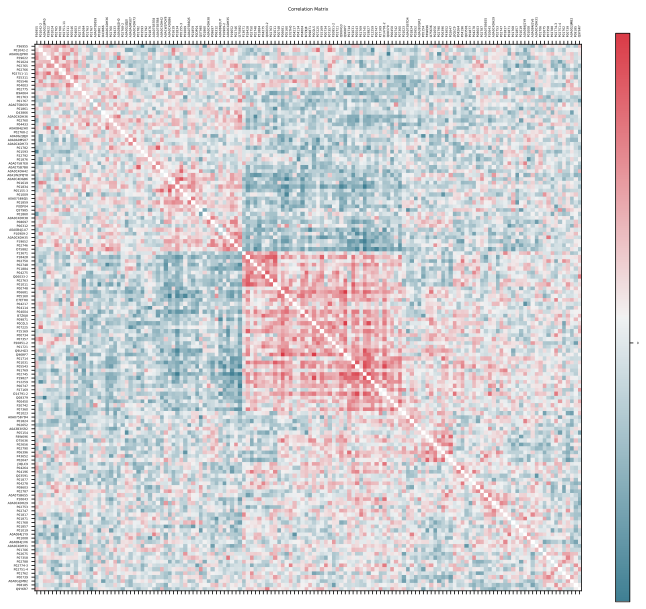

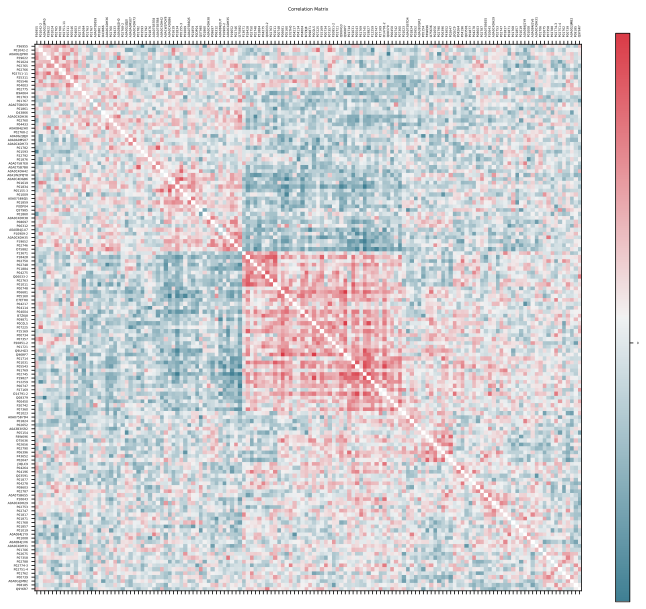

In [12]:
df = df_with_1
X = df.corr().values
X[np.isnan(X)]= 0
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)
plot_corr(df, size=10,font_scale=0.5)

#### Statistical Metrics

#### Machine Learning Efficacy

#### Similarity Score

## Step 4: Planning. Use simulations to plan future experiments

#### Class Prediction

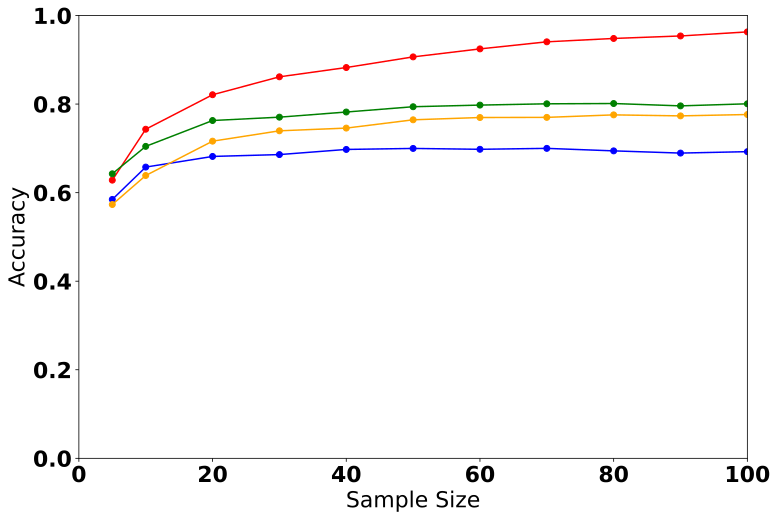

In [10]:
rfaccuracy = pd.read_csv('../casestudy/pdac/pdacdia/rfaccuracy.csv')
crc_data_val = rfaccuracy
# Plotting
# matplotlib.rcParams.update({'font.size': 22})
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental',marker='o', color='red')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='PP',marker='o', color='blue')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='CO',marker='o', color='orange')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
# plt.title('Accuracy vs Sample Size for Different Methods')
# plt.legend()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show plot
# plt.grid(True)
plt.ylim(0.0, 1.0)
plt.xlim(0,100)
plt.show()

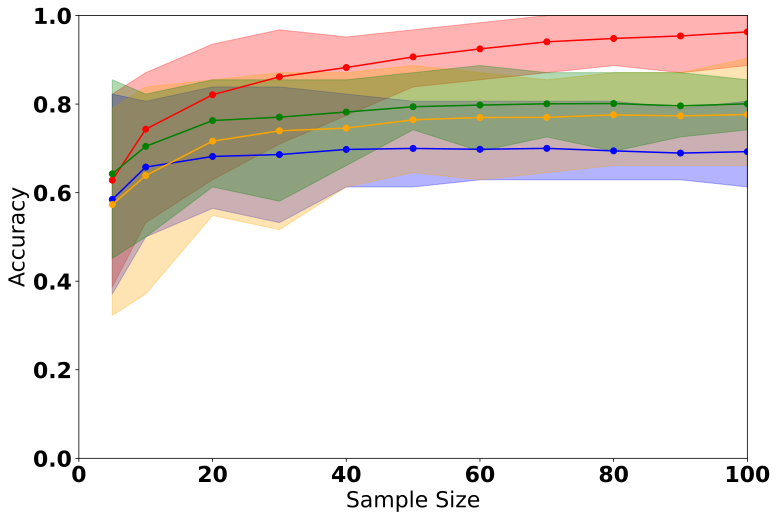

In [11]:
rfaccuracy = pd.read_csv('../casestudy/pdac/pdacdia/rfaccuracy.csv')
crc_data_val = rfaccuracy
# Plotting
# matplotlib.rcParams.update({'font.size': 22})
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental',marker='o', color='red')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='PP',marker='o', color='blue')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='CO',marker='o', color='orange')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
# plt.title('Accuracy vs Sample Size for Different Methods')
# plt.legend()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show plot
# plt.grid(True)
plt.ylim(0.0, 1.0)
plt.xlim(0,100)
plt.show()

##### Class Discovery

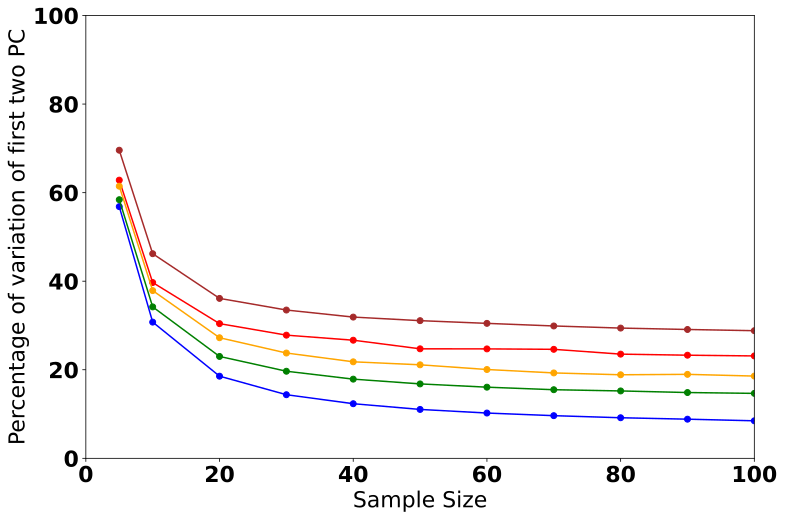

In [19]:
pcaaccuracy = pd.read_csv('../casestudy/pdac/pcanew.csv')
crc_data_val = pcaaccuracy

# Plotting
# matplotlib.rcParams.update({'font.size': 22})
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental',marker='o', color='red')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)

plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy v'],label='Experimental Validation',marker='o', color='brown')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min v'], crc_data_val['max v'], color='brown', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='PP',marker='o', color='blue')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='CO',marker='o', color='orange')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Percentage of variation of first two PC')
# plt.title('Accuracy vs Sample Size for Different Methods')
# plt.legend()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show plot
# plt.grid(True)
plt.ylim(0, 100)
plt.xlim(0,100)
plt.show()


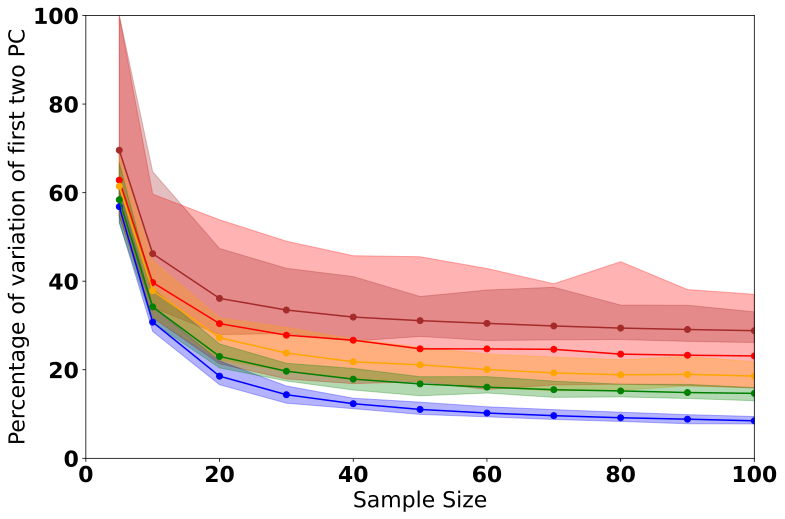

In [20]:
pcaaccuracy = pd.read_csv('../casestudy/pdac/pcanew.csv')
crc_data_val = pcaaccuracy

# Plotting
# matplotlib.rcParams.update({'font.size': 22})
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental',marker='o', color='red')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)

plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy v'],label='Experimental Validation',marker='o', color='brown')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min v'], crc_data_val['max v'], color='brown', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='PP',marker='o', color='blue')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='CO',marker='o', color='orange')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Percentage of variation of first two PC')
# plt.title('Accuracy vs Sample Size for Different Methods')
# plt.legend()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show plot
# plt.grid(True)
plt.ylim(0, 100)
plt.xlim(0,100)
plt.show()


##### Class Comparison

In [23]:
adjusted_p_values = {}
adjusted_p_values_pp = {}
adjusted_p_values_co = {}
adjusted_p_values_tvae = {}
dicts = {'real_adjust': adjusted_p_values, 'pp_adjust': adjusted_p_values_pp, 'co_adjust': adjusted_p_values_co, 'tvae_adjust': adjusted_p_values_tvae}  # Add more dictionaries as needed

# Load each JSON file and update the corresponding dictionary
for key, value in dicts.items():
    file_path = f'../casestudy/pdac/pval/{key}.json'
    with open(file_path, 'r') as json_file:
        value.update(json.load(json_file))
sample_sizes=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
real = []
pp = []
co = []
tvae = []
realmin = []
realmax = []
ppmin = []
ppmax = []
comin = []
comax = []
tvaemin = []
tvaemax = []

col = 'A0A0C4DH73'

for s in sample_sizes:
    s = str(s)
    real.append(np.median(adjusted_p_values[s][col]))
    pp.append(np.median(adjusted_p_values_pp[s][col]))
    co.append(np.median(adjusted_p_values_co[s][col]))
    tvae.append(np.median(adjusted_p_values_tvae[s][col]))
    realmin.append(np.min(adjusted_p_values[s][col]))
    realmax.append(np.max(adjusted_p_values[s][col]))
    ppmin.append(np.min(adjusted_p_values_pp[s][col]))
    ppmax.append(np.max(adjusted_p_values_pp[s][col]))
    comin.append(np.min(adjusted_p_values_co[s][col]))
    comax.append(np.max(adjusted_p_values_co[s][col])) 
    tvaemin.append(np.min(adjusted_p_values_tvae[s][col]))
    tvaemax.append(np.max(adjusted_p_values_tvae[s][col]))

  


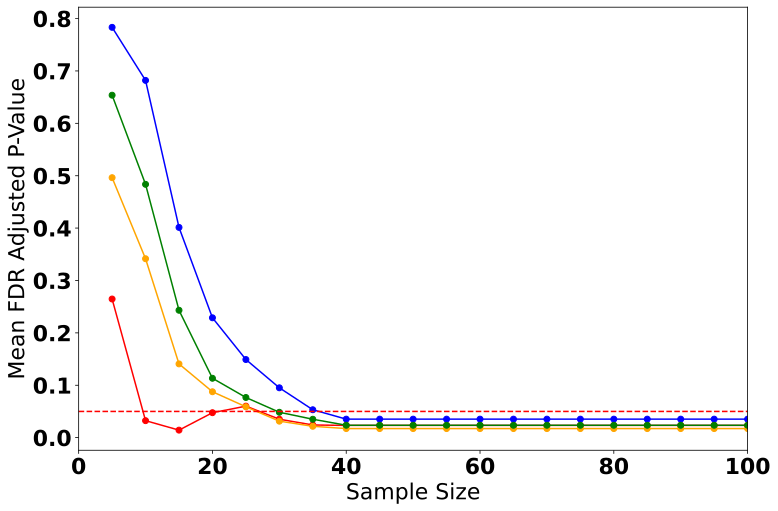

In [25]:
# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.plot(sample_sizes, real, marker='o', label='Experimental', color='red', linestyle='-')
# plt.fill_between(sample_sizes, realmin, realmax, color='red', alpha=0.3)

plt.plot(sample_sizes, pp, marker='o', label='Per-Protein', color='blue', linestyle='-')
# plt.fill_between(sample_sizes, ppmin, ppmax, color='blue', alpha=0.3)

plt.plot(sample_sizes, co, marker='o', label='Copula', color='orange', linestyle='-')
# plt.fill_between(sample_sizes, comin, comax, color='orange', alpha=0.3)

plt.plot(sample_sizes, tvae, marker='o', label='TVAE', color='green', linestyle='-')
# plt.fill_between(sample_sizes, tvaemin, tvaemax, color='green', alpha=0.3)

plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Mean FDR Adjusted P-Value')

plt.xlim(0,100)
plt.show()

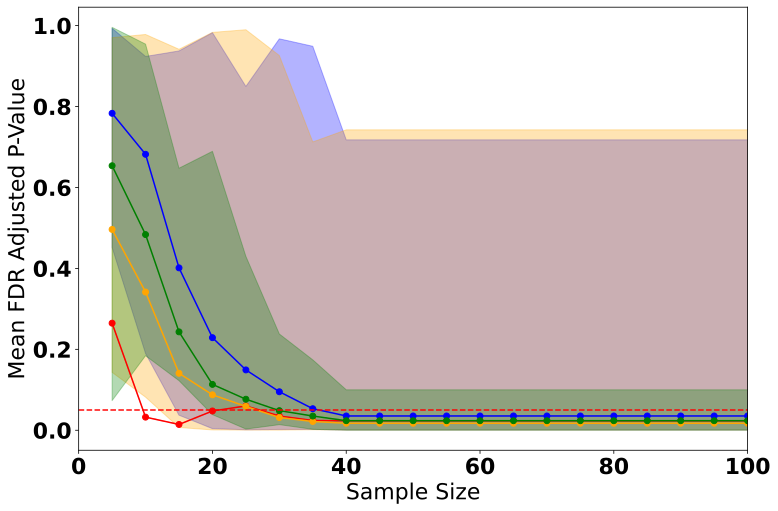

In [24]:

# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.plot(sample_sizes, real, marker='o', label='Experimental', color='red', linestyle='-')
plt.fill_between(sample_sizes, realmin, realmax, color='red', alpha=0.3)

plt.plot(sample_sizes, pp, marker='o', label='Per-Protein', color='blue', linestyle='-')
plt.fill_between(sample_sizes, ppmin, ppmax, color='blue', alpha=0.3)

plt.plot(sample_sizes, co, marker='o', label='Copula', color='orange', linestyle='-')
plt.fill_between(sample_sizes, comin, comax, color='orange', alpha=0.3)

plt.plot(sample_sizes, tvae, marker='o', label='TVAE', color='green', linestyle='-')
plt.fill_between(sample_sizes, tvaemin, tvaemax, color='green', alpha=0.3)

plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Mean FDR Adjusted P-Value')

plt.xlim(0,100)
plt.show()